### This program detects edges of the images using canny edge detector,removes unwanted borders and then converts then from gray to colored.


In [124]:
%pylab inline
import matplotlib.pyplot as plt 
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [106]:
import  glob
from scipy import ndimage
import scipy
from  skimage.feature import canny
def load_data(dir_name = 'plates'):
    
    
    data = []
    for img in glob.glob(dir_name + '/*.png'):
        data.append(imread(img)[:,:,0])
    return data

plates = load_data()

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


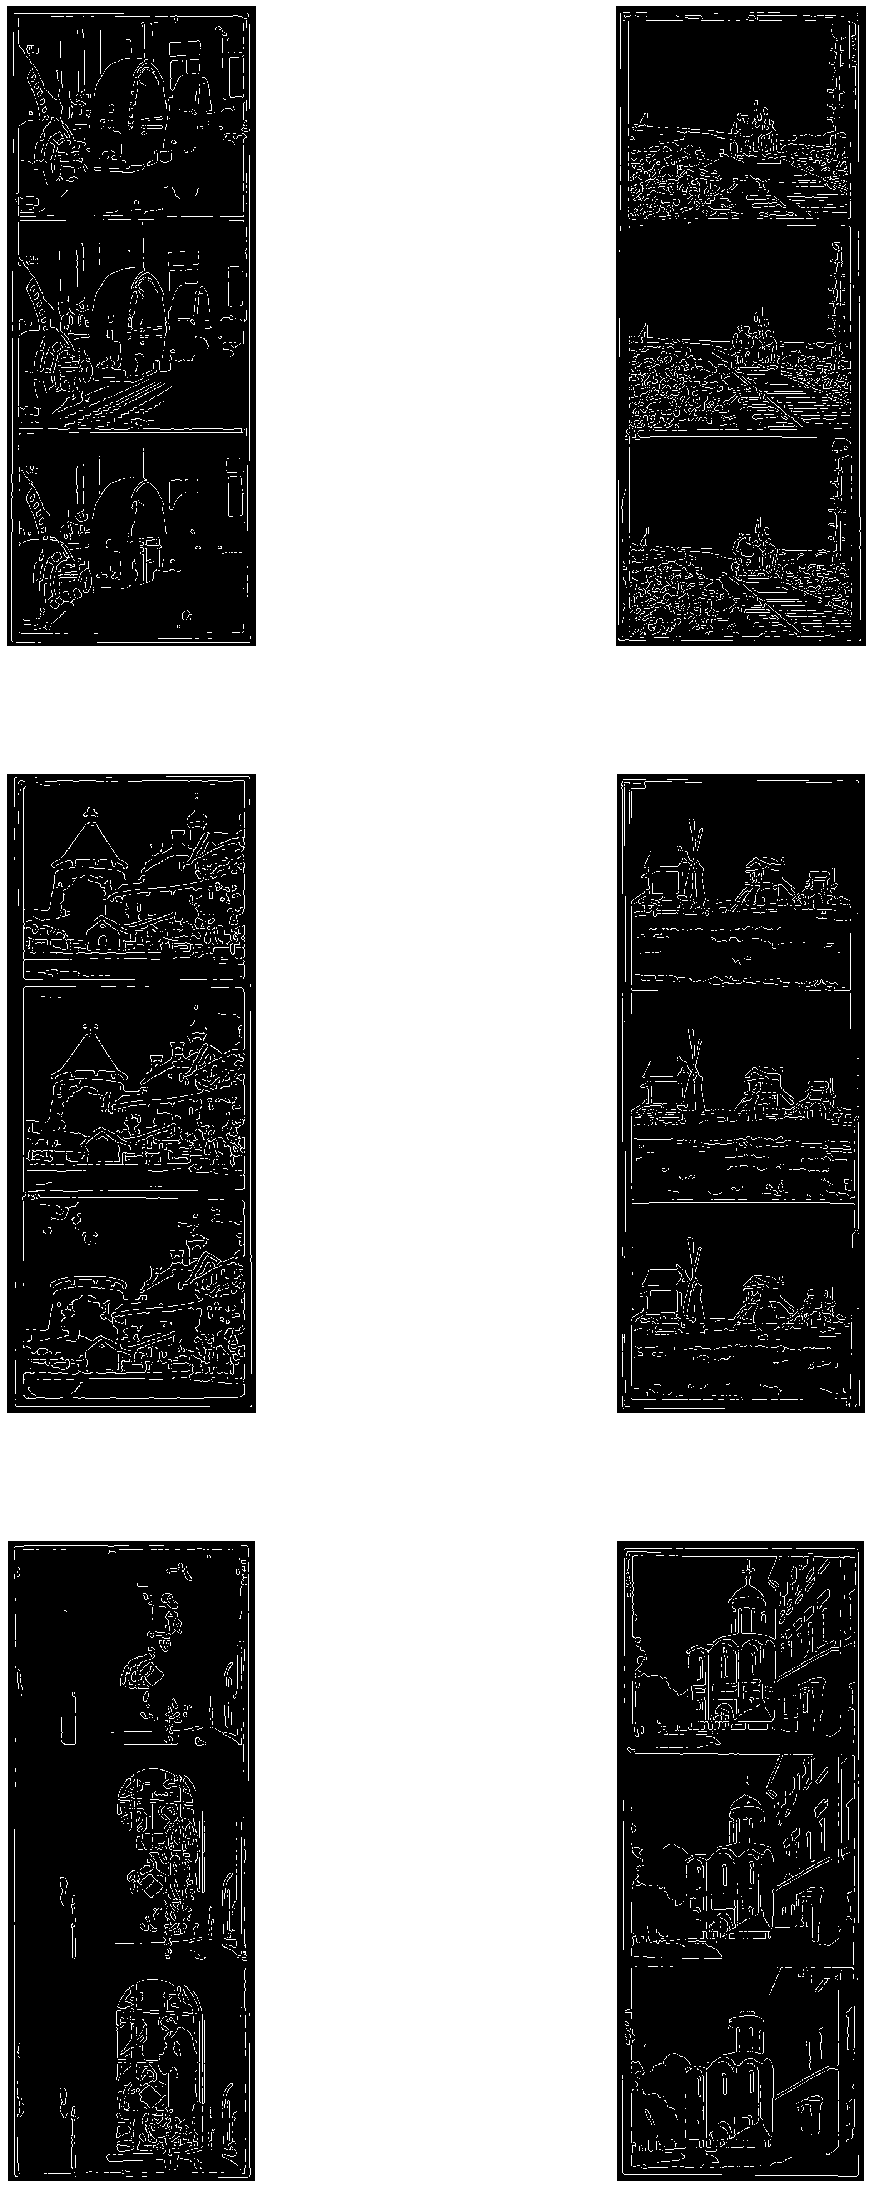

In [128]:
def visualize(imgs, format=None):
    plt.figure(figsize=(20, 40))
    for i, img in enumerate(imgs):
        if img.shape[0] == 3:
            img = img.transpose(1,2,0)
        plt_idx = i+1
        plt.subplot(3, 2, plt_idx)    
        plt.imshow(img, cmap=format)
        plt.axis('off')
    plt.show()

#Canny edge detector
def Canny_detector(img):
    img = ndimage.filters.gaussian_filter(img, sigma=1.9) #noise reduction
    gx = ndimage.sobel(img, 0 )
    gy = ndimage.sobel(img, 1 ) #sobel filters
    magnitude = np.hypot(gx, gy) #magnitude
    slope = arctan(2*gy/gx) #angle or slope
    return canny(img)

canny_imgs = []
for img in plates:
    canny_img = Canny_detector(img)
    canny_imgs.append(canny_img)
    
visualize(canny_imgs, 'gray')

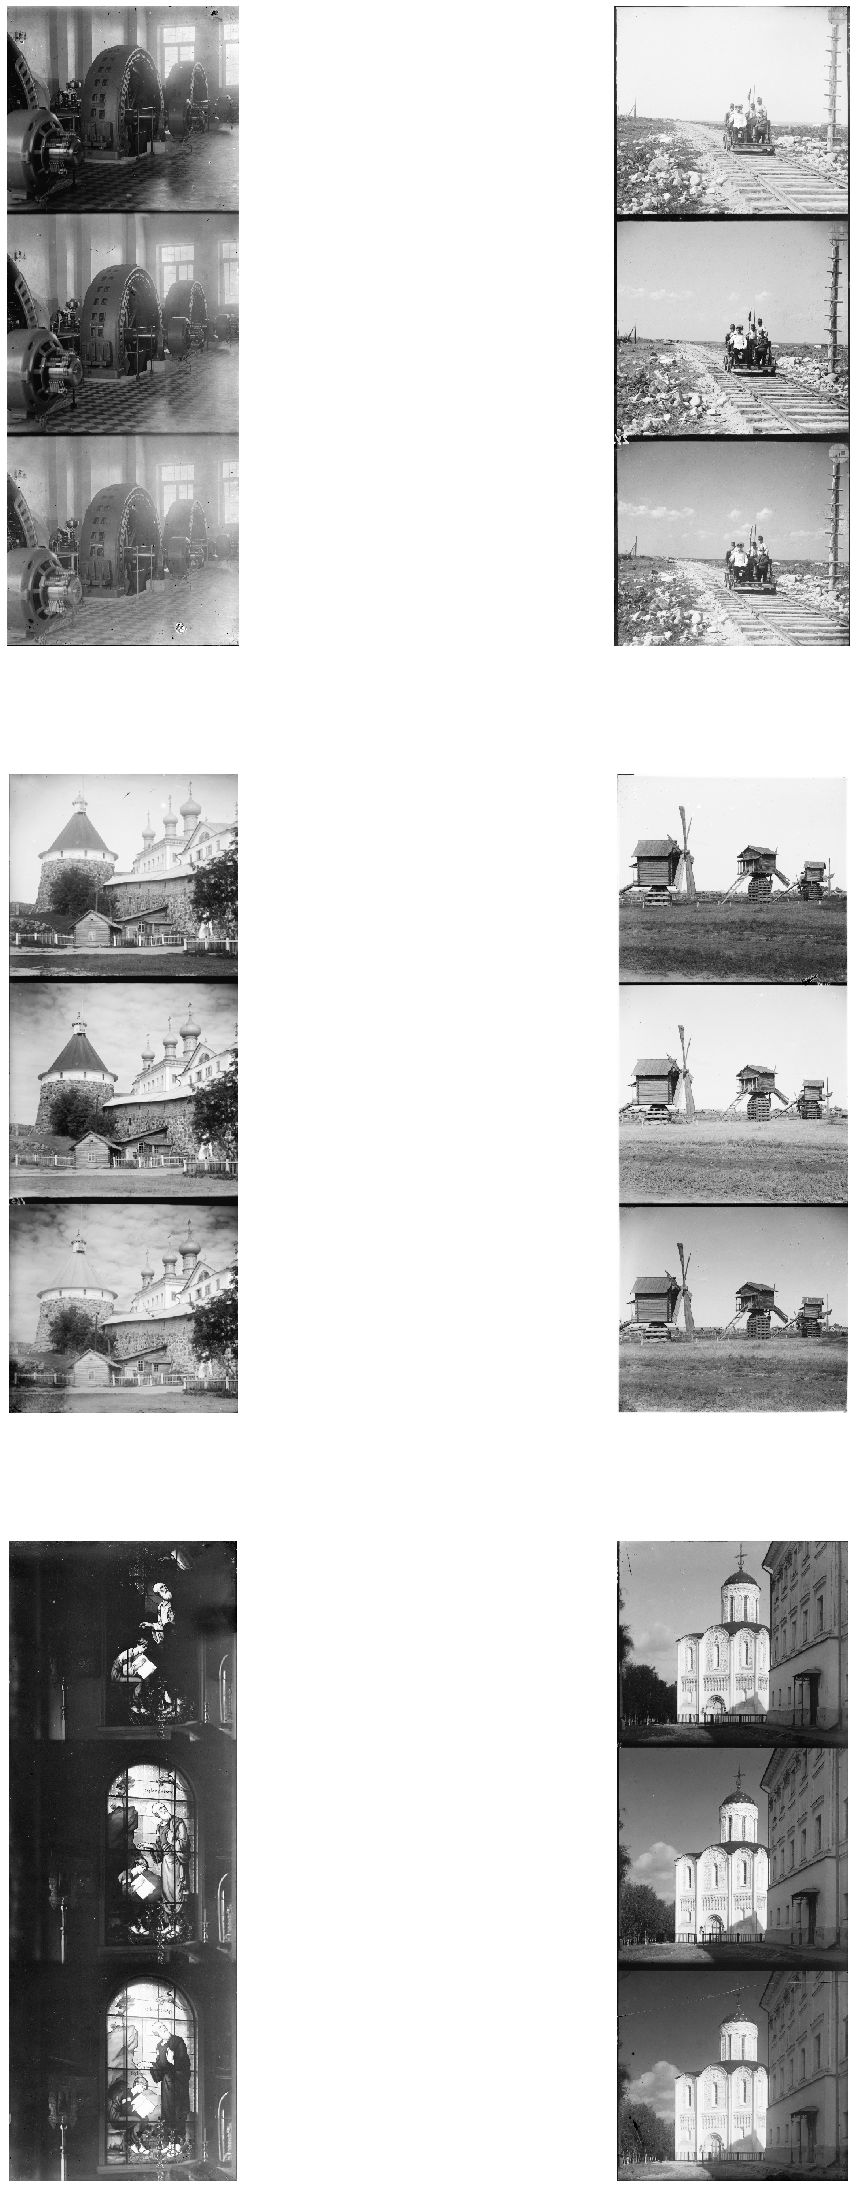

In [122]:
#removing borders after detecting outer edges
def remove_borders(img, canny_img):
    #dx = int(img.shape[1] * 0.05) 
    for di in range(canny_img.shape[0]):
        if(np.sum(canny_img[di,:]==True)):
            break
            
    for dj in range(canny_img.shape[0]-1, 0, -1):
        if(np.sum(canny_img[dj,:]==True)):
            break
            
    for dk in range(canny_img.shape[1]):
        if(np.sum(canny_img[:,dk]==True)):
            break
            
    for dl in range(canny_img.shape[1]-1, 0, -1):
        if(np.sum(canny_img[:,dl]==True)):
            break
        
    tolerance = 15
    
    return img[di+tolerance:dj-tolerance, dk+tolerance:dl-tolerance]


cropped_imgs = []
#crop borders
for i, img in enumerate(plates):
    cropped_imgs.append(remove_borders(img, canny_imgs[i]))

visualize(cropped_imgs, 'gray')                                 

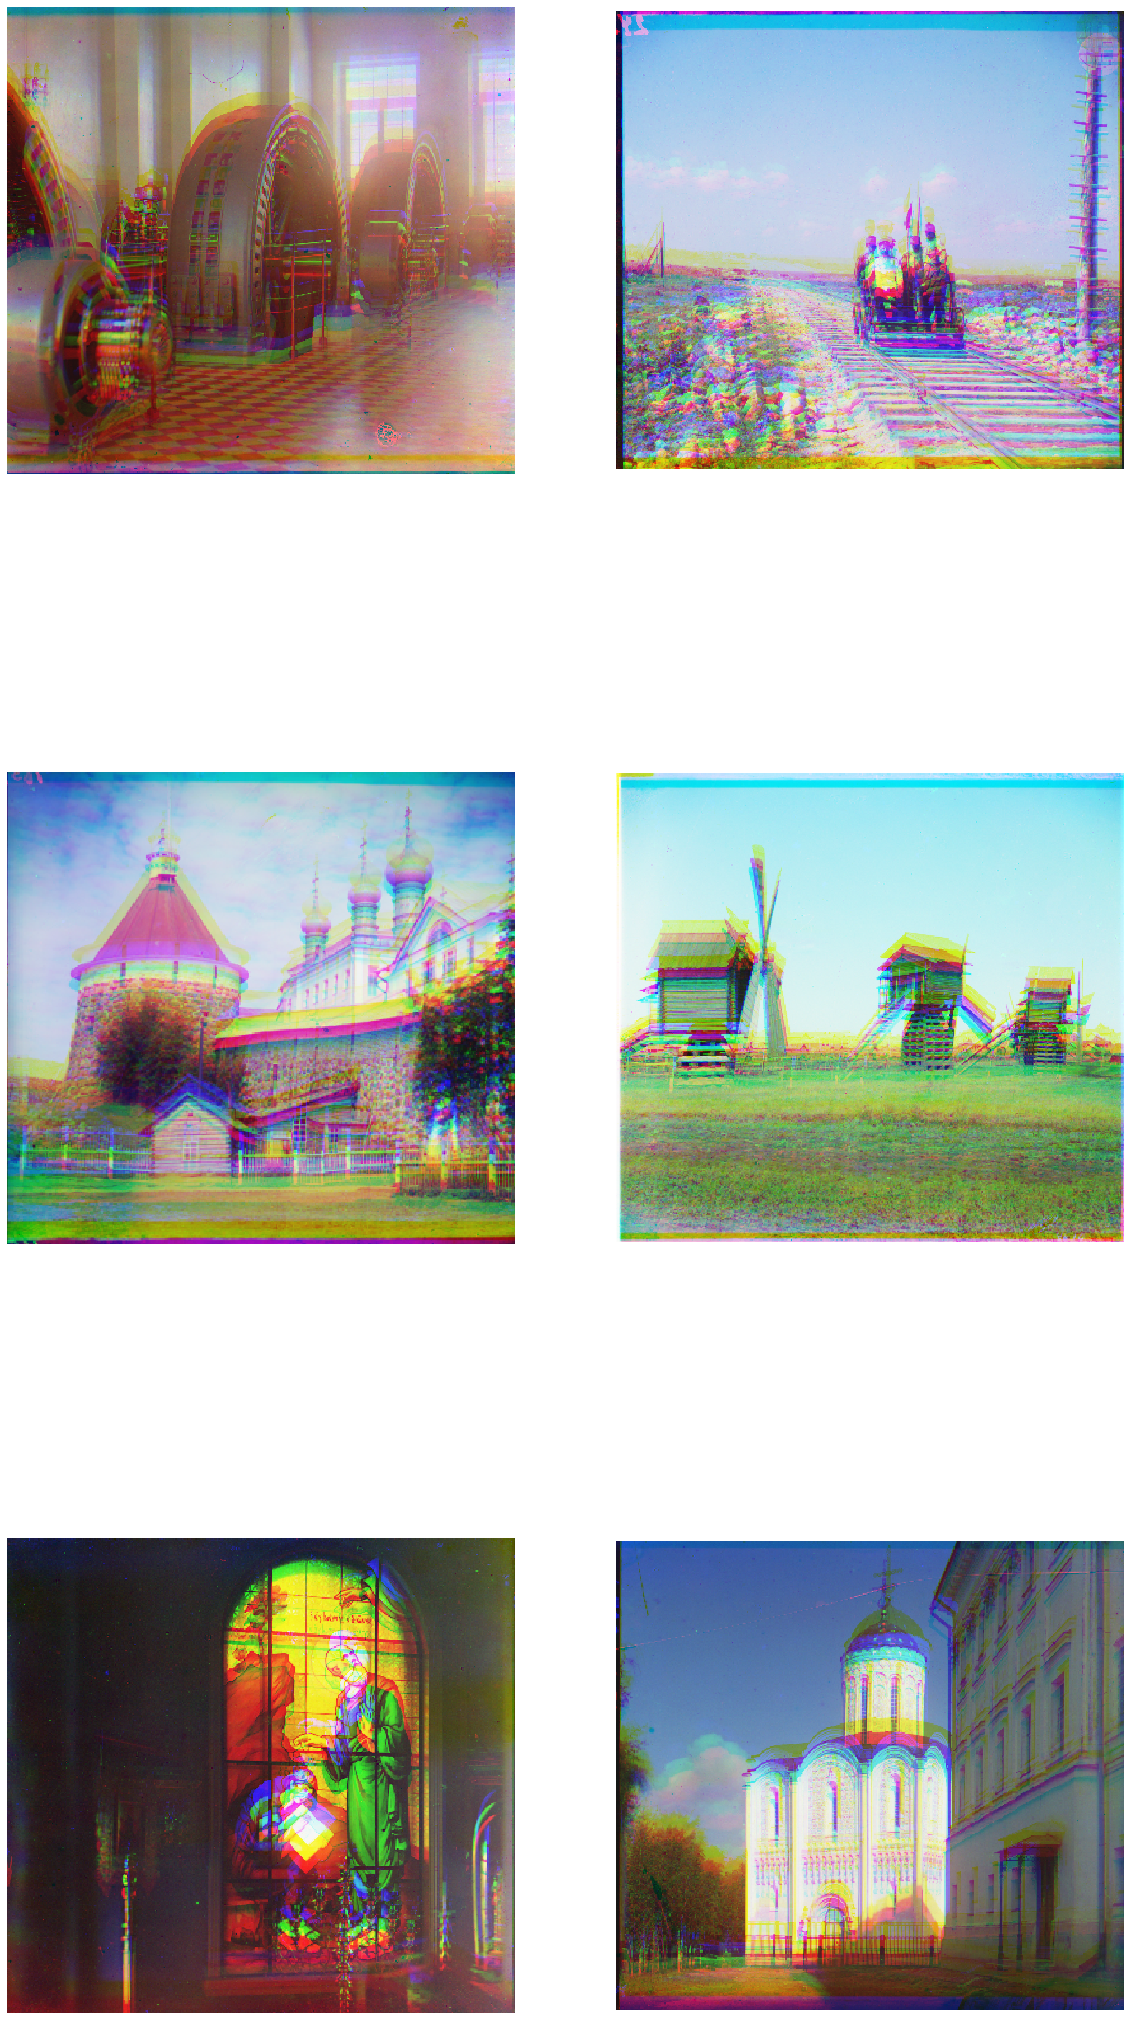

In [123]:
#seperating rgb channels to convert to colored
def color(img):
    h = img.shape[0] //3
    
    rgb_img =  np.zeros( (h, img.shape[1],3)   ) 
    
    rgb_img[:,:,2] = img[0 : h, :]
    rgb_img[:,:,1] = img[h : h*2, :]
    rgb_img[:,:,0] = img[2*h : h*3, :]
    
    return rgb_img


rgb_imgs = []
for cropped_img in cropped_imgs:
    rgb_img = color(cropped_img)
    rgb_imgs.append(rgb_img)

visualize(rgb_imgs)